In [103]:
import pandas as pd
import numpy as np

In [104]:
df=pd.read_csv('diabetes.csv')

In [ ]:
Data Pre-Procession

In [105]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#checking for null values in perfentages as in form of zeros

In [106]:
sr=df.isin([0]).mean()*100

In [107]:
sr

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64

In [ ]:
#converting 0 to null values and checking again

In [447]:
#data=df.drop(['Outcome'],axis=1)
nc=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
df[nc]=df[nc].replace(0,np.NaN)
sr=df.isnull().mean()*100
sr

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [ ]:
#dropped the column whose null value percentage is more than 30%

In [448]:
sr[sr>30].index

Index(['Insulin'], dtype='object')

In [451]:
data=df.copy()
data=data.drop(list(sr[sr>30].index),axis=1)

In [ ]:
#treating null values by replacing it with mean/median

<AxesSubplot:ylabel='Density'>

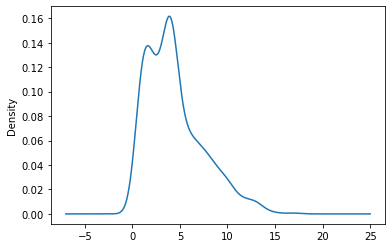

In [459]:
data.Pregnancies.plot(kind='kde')


In [460]:
data.Pregnancies=data.Pregnancies.fillna(data.Pregnancies.median())

<AxesSubplot:ylabel='Density'>

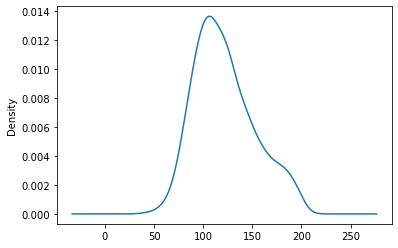

In [461]:
data.Glucose.plot(kind='kde')



72.40518417462484

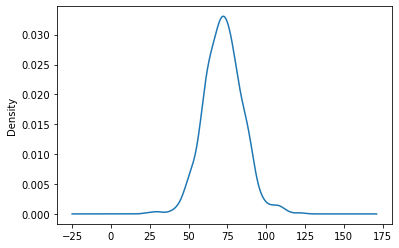

In [462]:
data.BloodPressure.plot(kind='kde')
data.BloodPressure.mean()

29.153419593345657

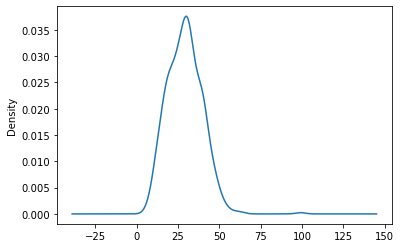

In [463]:
data.SkinThickness.plot(kind='kde')
data.SkinThickness.mean()

32.45746367239099

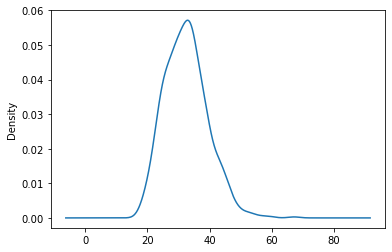

In [464]:
data.BMI.plot(kind='kde')
data.BMI.mean()

<AxesSubplot:ylabel='Density'>

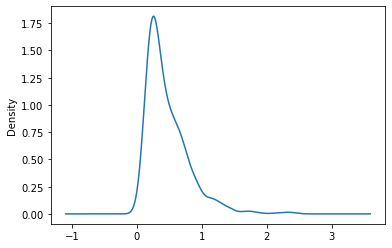

In [465]:
data.DiabetesPedigreeFunction.plot(kind='kde')


<AxesSubplot:ylabel='Density'>

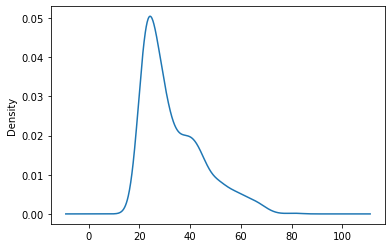

In [466]:
data.Age.plot(kind='kde')

In [467]:
data.Glucose=data.Glucose.fillna(data.Glucose.median())
data.BloodPressure=data.BloodPressure.fillna(data.BloodPressure.mean())
data.SkinThickness=data.SkinThickness.fillna(data.SkinThickness.median())
data.BMI=data.BMI.fillna(data.BMI.median())
data.DiabetesPedigreeFunction=data.DiabetesPedigreeFunction.fillna(data.DiabetesPedigreeFunction.median())
data.Age=data.Age.fillna(data.Age.median())

In [468]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#outlier checking and treatment by capping outliers

In [553]:
import seaborn as sns
data_outlier_rem=data.copy()

<AxesSubplot:xlabel='Pregnancies'>

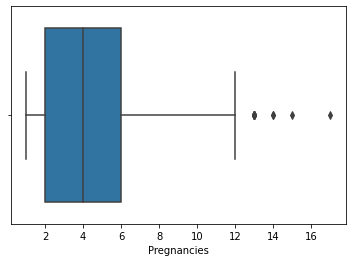

In [554]:
sns.boxplot(x=data_outlier_rem['Pregnancies'])

In [555]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['Pregnancies'].values<8]

<AxesSubplot:xlabel='Pregnancies'>

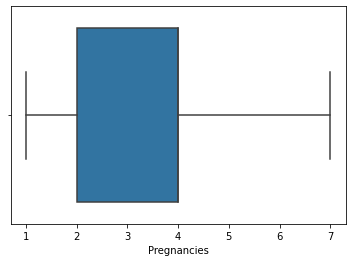

In [556]:
sns.boxplot(x=data_outlier_rem['Pregnancies'])

<AxesSubplot:xlabel='Glucose'>

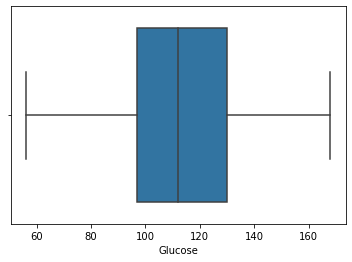

In [557]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['Glucose'].values<169]
data_outlier_rem=data_outlier_rem[data_outlier_rem['Glucose'].values>50]
sns.boxplot(x=data_outlier_rem['Glucose'])

<AxesSubplot:xlabel='BloodPressure'>

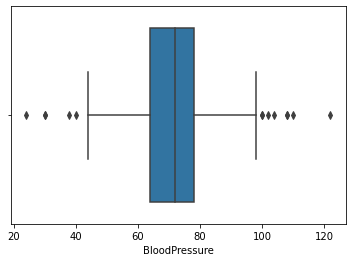

In [558]:
sns.boxplot(x=data_outlier_rem['BloodPressure'])

In [559]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['BloodPressure'].values>40]

In [560]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['BloodPressure'].values<100]

<AxesSubplot:xlabel='BloodPressure'>

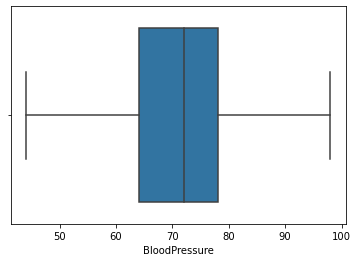

In [561]:
sns.boxplot(x=data_outlier_rem['BloodPressure'])

<AxesSubplot:xlabel='SkinThickness'>

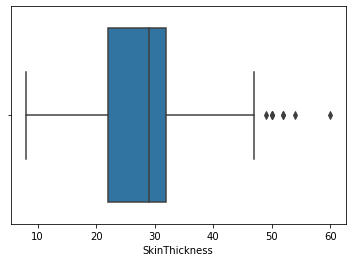

In [570]:
sns.boxplot(x=data_outlier_rem['SkinThickness'])

In [577]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['SkinThickness'].values<44]


<AxesSubplot:xlabel='SkinThickness'>

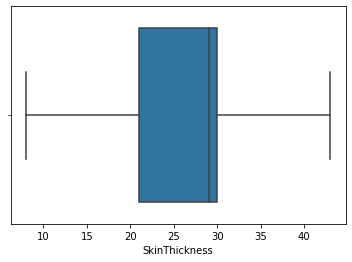

In [579]:
sns.boxplot(x=data_outlier_rem['SkinThickness'])

<AxesSubplot:xlabel='BMI'>

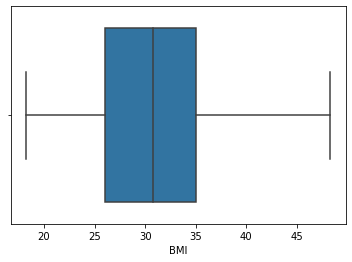

In [580]:
sns.boxplot(x=data_outlier_rem['BMI'])

<AxesSubplot:xlabel='BMI'>

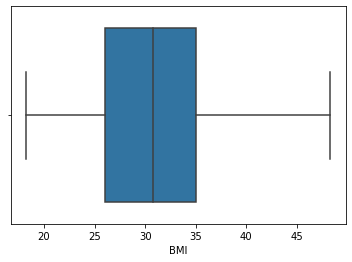

In [581]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['BMI'].values<49]
sns.boxplot(x=data_outlier_rem['BMI'])

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

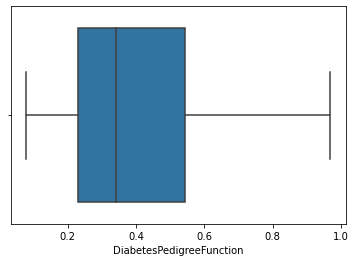

In [582]:
sns.boxplot(x=data_outlier_rem['DiabetesPedigreeFunction'])

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

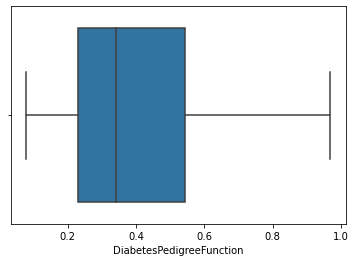

In [583]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['DiabetesPedigreeFunction'].values<1]
sns.boxplot(x=data_outlier_rem['DiabetesPedigreeFunction'])

<AxesSubplot:xlabel='Age'>

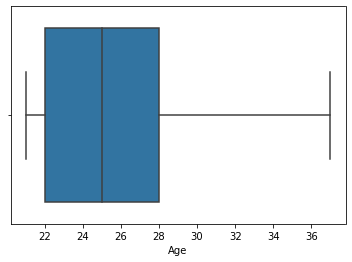

In [584]:
sns.boxplot(x=data_outlier_rem['Age'])

<AxesSubplot:xlabel='Age'>

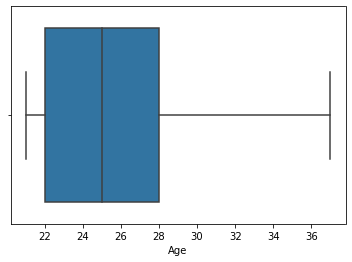

In [585]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['Age'].values<37.5]
sns.boxplot(x=data_outlier_rem['Age'])

In [586]:
data_outlier_rem

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1.0,85.0,66.0,29.0,26.6,0.351,31,0
3,1.0,89.0,66.0,23.0,28.1,0.167,21,0
5,5.0,116.0,74.0,29.0,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,31.0,0.248,26,1
10,4.0,110.0,92.0,29.0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...
758,1.0,106.0,76.0,29.0,37.5,0.197,26,0
760,2.0,88.0,58.0,26.0,28.4,0.766,22,0
764,2.0,122.0,70.0,27.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,26.2,0.245,30,0


<AxesSubplot:xlabel='SkinThickness'>

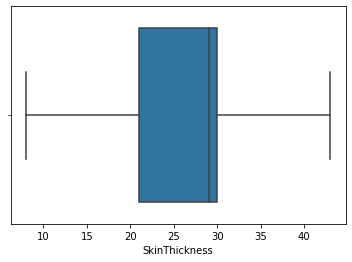

In [587]:
sns.boxplot(x=data_outlier_rem['SkinThickness'])

In [ ]:
#checking the output data is balanced or not

0    334
1     77
Name: Outcome, dtype: int64

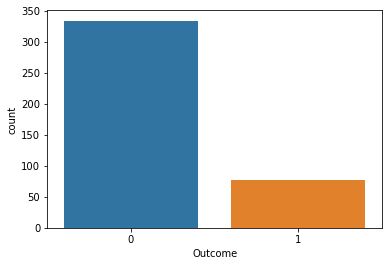

In [589]:
death=data_outlier_rem.copy()
sns.countplot(x=death['Outcome'])
death['Outcome'].value_counts()

In [ ]:
#as it is not balanced we balanced by resampling

In [592]:
from sklearn.utils import resample
dm=death[(death['Outcome']==0)]
dmin=death[(death['Outcome']==1)]
upsample=resample(dmin,replace=True,n_samples=334,random_state=42)
dd=pd.concat([upsample, dm])

1    334
0    334
Name: Outcome, dtype: int64

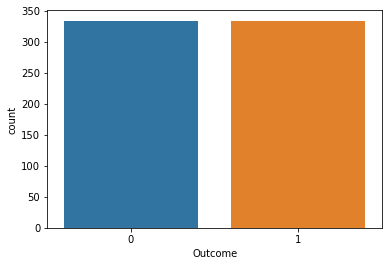

In [593]:
sns.countplot(x=dd['Outcome'])
dd['Outcome'].value_counts()

In [ ]:
#checking for co-relation

In [594]:
dd.corr()["Outcome"].sort_values(ascending= False)

Outcome                     1.000000
Glucose                     0.458909
BMI                         0.358704
Age                         0.351587
SkinThickness               0.280357
Pregnancies                 0.250638
DiabetesPedigreeFunction    0.231490
BloodPressure               0.092890
Name: Outcome, dtype: float64

<AxesSubplot:>

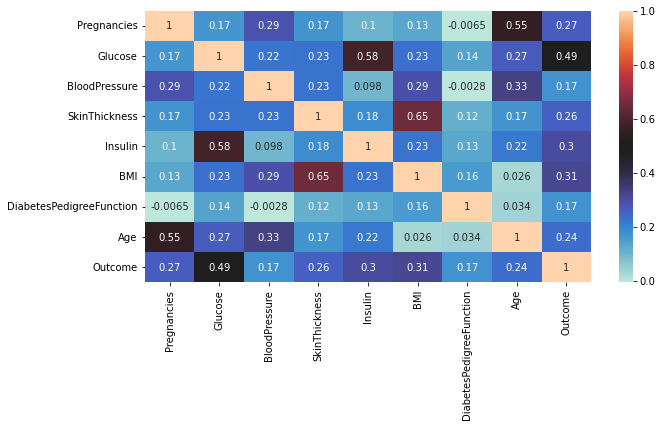

In [597]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10,5))
corr=df.corr()
sns.heatmap(corr,cmap="icefire", annot=True)

In [598]:
dd


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
400,4.0,95.0,64.0,29.0,32.0,0.161,31,1
179,5.0,130.0,82.0,29.0,39.1,0.956,37,1
646,1.0,167.0,74.0,17.0,23.4,0.447,33,1
480,3.0,158.0,70.0,30.0,35.5,0.344,35,1
213,4.0,140.0,65.0,26.0,42.6,0.431,24,1
...,...,...,...,...,...,...,...,...
758,1.0,106.0,76.0,29.0,37.5,0.197,26,0
760,2.0,88.0,58.0,26.0,28.4,0.766,22,0
764,2.0,122.0,70.0,27.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,26.2,0.245,30,0


In [599]:
x=dd.drop('Outcome',axis=1)
y=dd['Outcome']

In [615]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
clf=LabelEncoder()

dd['Outcome']=clf.fit_transform(dd['Outcome'])

x_train, x_test, y_train, y_test= train_test_split(x, y, stratify=y, test_size=0.2)

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=10000)
log.fit(x_train, y_train)

print("The Training accuracy of the model is {:.2f}".format(log.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(log.score(x_test, y_test)))

The Training accuracy of the model is 0.80
The Testing accuracy of the model is 0.78


In [619]:
from sklearn.metrics import confusion_matrix
p=log.predict(x_test)
m=confusion_matrix(y_test,p)
m

array([[52, 15],
       [14, 53]], dtype=int64)

<AxesSubplot:>

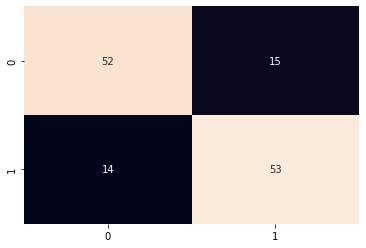

In [622]:
sns.heatmap(m, cbar= False, fmt='g', annot= True)

In [611]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print("Accuracy With Decision Tree: {}".format(accuracy_score(y_pred,Y_test)))

Accuracy With Decision Tree: 0.9253731343283582


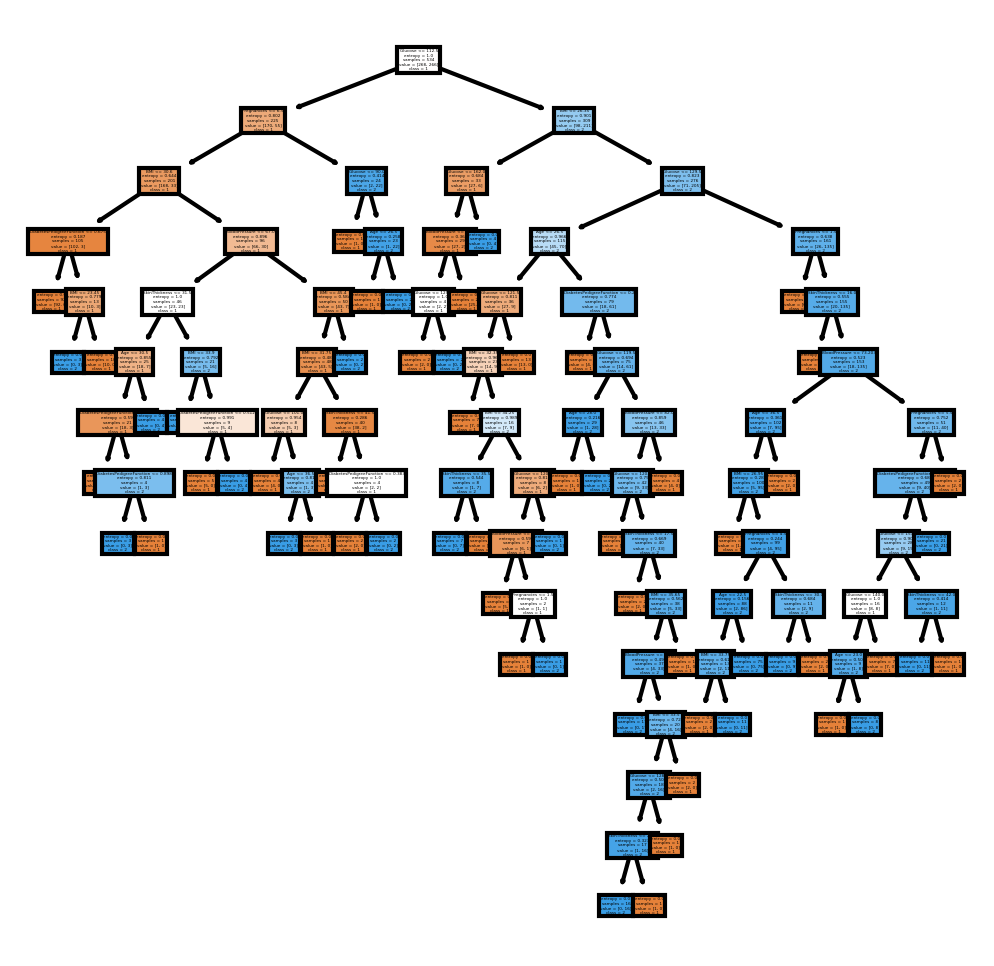

In [612]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = x.columns, 
               class_names=['1','2','3','4','5','6','7'],
               filled = True);

In [624]:
from sklearn.ensemble import RandomForestClassifier
ranf=RandomForestClassifier()
ranf.fit(X_train,Y_train)
prf=ranf.predict(X_test)

In [629]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(Y_test,prf)
cm


array([[60,  6],
       [ 0, 68]], dtype=int64)

Accuracy With Decision Tree:  0.96


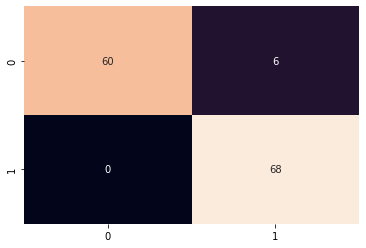

In [632]:
sns.heatmap(cm, cbar= False, fmt= 'g', annot= True)

print("Accuracy With Decision Tree: ",round(accuracy_score(prf,Y_test),2))